# Mnist Classification

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

2023-10-04 10:51:26.687949: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 10:51:26.736191: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 10:51:26.737028: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 10:51:27.575748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = mnist.load_data('mnist.db')

In [3]:
train,test = dataset

In [4]:
len(train)

2

In [5]:
X_train, y_train = train

In [6]:
X_test, y_test = test

In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0].ndim

2

In [11]:
img = X_train[1]

In [12]:
X_train = X_train.reshape(-1,28*28)
#X_train = X_train.reshape(-1, 1, 28*28)

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_test = X_test.reshape(-1, 28*28)

In [15]:
X_test.shape

(10000, 784)

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_train = to_categorical(y_train)


In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
model=Sequential()

In [20]:
model.add( 
    Dense(units = 512 , input_shape = (784,) , activation = 'relu' )
)
model.add( 
    Dense(units = 256 , activation = 'relu' )
)
model.add( 
    Dense(units = 128 , activation = 'relu' )
)
model.add( 
    Dense(units = 64 , activation = 'relu')
)
model.add( 
    Dense(units = 10 , activation =  'softmax')
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(
    optimizer='adam',
    
    loss='categorical_crossentropy',
    
    metrics=['accuracy']
)

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.7356 - accuracy: 0.8931 - val_loss: 0.2116 - val_accuracy: 0.9416
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1850 - accuracy: 0.9497 - val_loss: 0.2028 - val_accuracy: 0.9448
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1508 - accuracy: 0.9577 - val_loss: 0.2331 - val_accuracy: 0.9403
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1313 - accuracy: 0.9642 - val_loss: 0.1444 - val_accuracy: 0.9600
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1110 - accuracy: 0.9688 - val_loss: 0.1411 - val_accuracy: 0.9616
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0959 - accuracy: 0.9737 - val_loss: 0.1225 - val_accuracy: 0.9667
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0878 - accuracy: 0.9762 - val_loss: 0.1278 - val_ac

In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, to_categorical(y_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9705
Test Accuracy: 97.05%


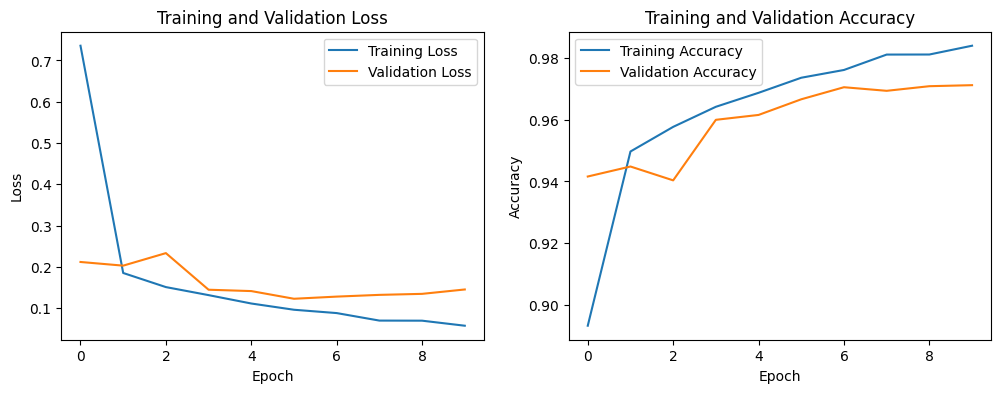

In [25]:

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


In [26]:
# Predict with the Model:
# Select multiple sample images from the test set (e.g., the first 10 images)
sample_images = X_test


In [27]:
# Use the trained model to make predictions on the selected images
predictions = model.predict(sample_images)

313/313 [==============================] - 1s 2ms/step


In [28]:
# Print the predictions
print(predictions)

[[2.4266282e-18 1.1003781e-09 1.0253864e-07 ... 9.9996096e-01
  1.3274960e-10 3.8810962e-05]
 [4.5908846e-11 9.8897113e-10 9.9999994e-01 ... 1.5603567e-10
  1.2436201e-12 5.5139453e-20]
 [5.6505934e-25 9.9999994e-01 7.2905596e-14 ... 7.1399650e-11
  5.5213480e-11 1.7755827e-12]
 ...
 [8.5875453e-15 3.9195182e-16 3.7125490e-11 ... 2.1528382e-15
  2.3558910e-11 3.1828524e-05]
 [3.9371199e-29 7.3392504e-22 5.2636875e-29 ... 7.5792229e-28
  2.1197635e-15 1.6700468e-15]
 [1.4849806e-09 1.4801699e-10 8.4905506e-11 ... 1.5663194e-14
  8.1428331e-09 3.6983936e-12]]


In [29]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)



In [30]:
# Print the predicted labels
print("Predicted Labels:", predicted_labels)



Predicted Labels: [7 2 1 ... 4 5 6]


In [31]:
# Generate a confusion matrix and classification report
y_true = y_test
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_true, y_pred_labels)
classification_report_str = classification_report(y_true, y_pred_labels)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
 [[ 961    2    2    1    0    1    2    3    5    3]
 [   0 1124    2    3    1    1    1    0    3    0]
 [   5    1 1000   10    1    0    1    3   11    0]
 [   0    0    6  980    0    2    0    5    6   11]
 [   3    1    2    0  961    1    1    2    1   10]
 [   4    1    0    7    1  852    4    1    7   15]
 [   7    3    2    1   10    4  919    0   12    0]
 [   1    8   20    1    0    0    0  988    4    6]
 [   0    1    5    7    1    3    1    1  949    6]
 [   4    3    0    3    9    1    0    5   13  971]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97   

313/313 [==============================] - 1s 2ms/step


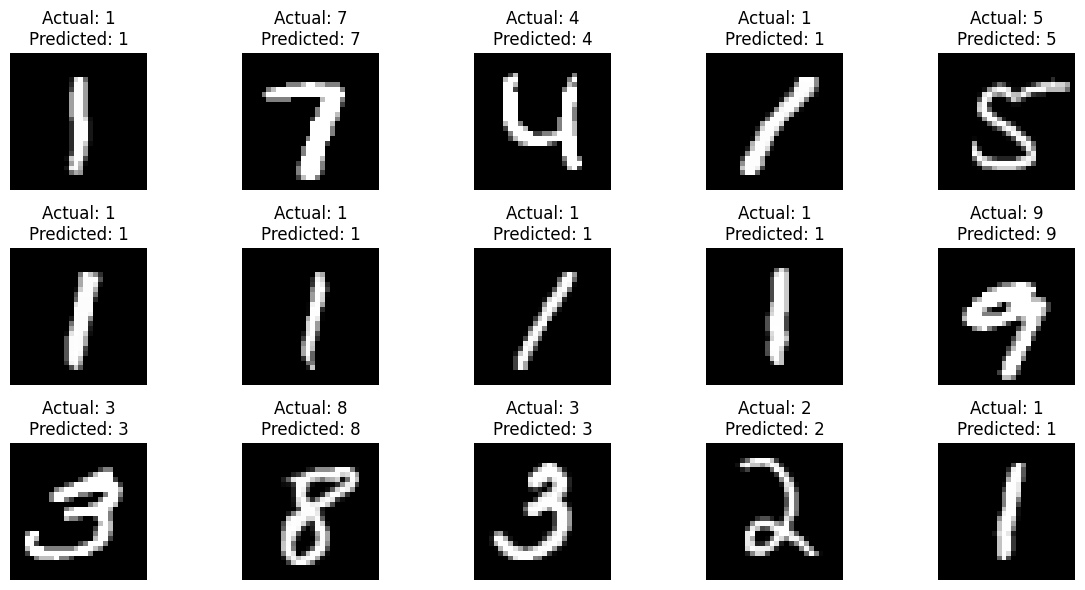

In [33]:

# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Select some random test samples (e.g., the first 15)
num_samples_to_display = 15
sample_indices = np.random.choice(len(X_test), num_samples_to_display, replace=False)

# Create a figure to display the comparison
plt.figure(figsize=(12, 6))

for i, sample_index in enumerate(sample_indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[sample_index]}\nPredicted: {predicted_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

